***DATASET INFORMATION***

---
1.] age - age in years

2.] sex - (1 = male; 0 = female)

3.] cp - chest pain type

    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease

4.] trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

5.] chol - serum cholestoral in mg/dl

6.] serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern

7.] fbs - (fasting blood sugar > 120 mg/dl) \
    (1 = true; 0 = false) '>126' mg/dL signals diabetes

8.] restecg - resting electrocardiographic results

    0: Nothing to note
    1: ST-T Wave abnormality
    -> can range from mild symptoms to severe problems
    -> signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
    ->Enlarged heart's main pumping chamber
9.] thalach - maximum heart rate achieved

10.] exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11.] slope - the slope of the peak exercise ST segment

    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
12.] ca - number of major vessels (0-3) colored by flourosopy

    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
13.] thal - thalium stress result

    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising

14.] target - have disease or not (1=yes, 0=no) (= the predicted attribute)
2.0



***Attribute Description:***

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data=pd.read_csv("/content/Heart Disease data.csv")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [15]:
print(f'Number of Features : {data.shape[1]}')
print(f'Number of Observations : {data.shape[0]}')

Number of Features : 14
Number of Observations : 1025


In [16]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
results=data["sex"].value_counts()
results

sex
1    713
0    312
Name: count, dtype: int64

In [19]:
tg=data.groupby('target')
tg.first()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,58,0,0,100,248,0,0,122,0,1.0,1,0,2


PIE CHART FOR CATEGORY DATA

---



([<matplotlib.patches.Wedge at 0x7c4114371840>,
 [Text(0.6342285709599224, 0.8987514226849017, 'Female'),
  Text(-0.6342285709599221, -0.8987514226849018, 'Male')])

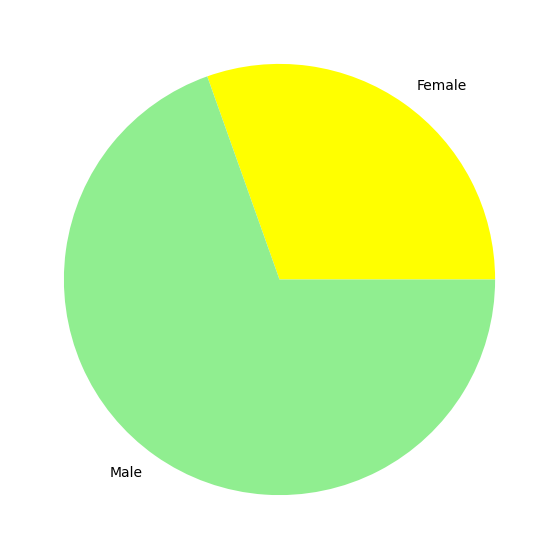

In [28]:
values=[results[0], results[1]]
labels = ['Female', 'Male']
colors= ['yellow', 'lightgreen']
fig=plt.figure(figsize=(10,7))
plt.pie(values, labels=labels, colors =colors)



---


**cp - chest pain type**

    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease

<Axes: >

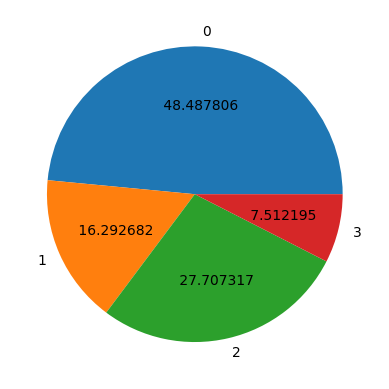

In [51]:
data.groupby('cp').size().plot(kind= 'pie' ,autopct='% 1f')



---
**restecg - resting electrocardiographic results**

    0: Nothing to note
    1: ST-T Wave abnormality
    -> can range from mild symptoms to severe problems
    -> signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
    ->Enlarged heart's main pumping chamber


<Axes: >

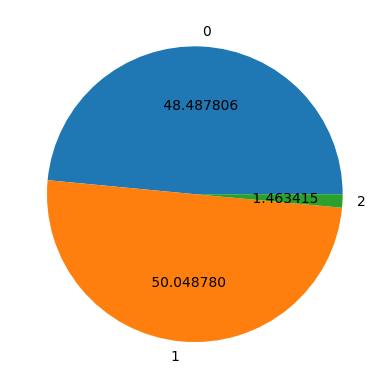

In [52]:
data.groupby('restecg').size().plot(kind= 'pie' ,autopct='% 1f')



---

**slope- the slope of the peak exercise ST segment**

0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart

<Axes: >

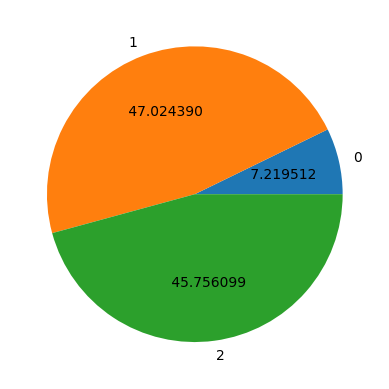

In [53]:
data.groupby('slope').size().plot(kind= 'pie' ,autopct='% 1f')

<Axes: >

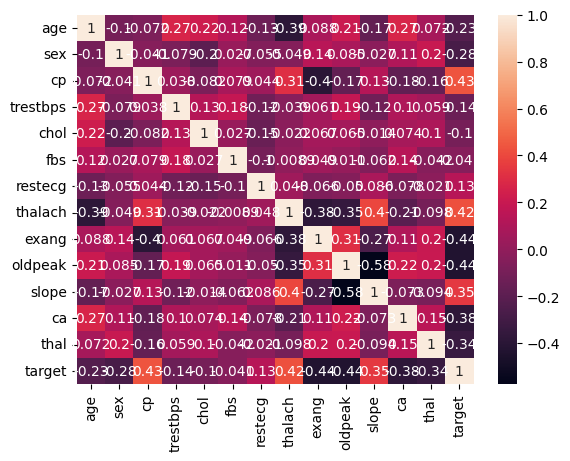

In [30]:
sns.heatmap(data.corr(),annot=True)

In [31]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

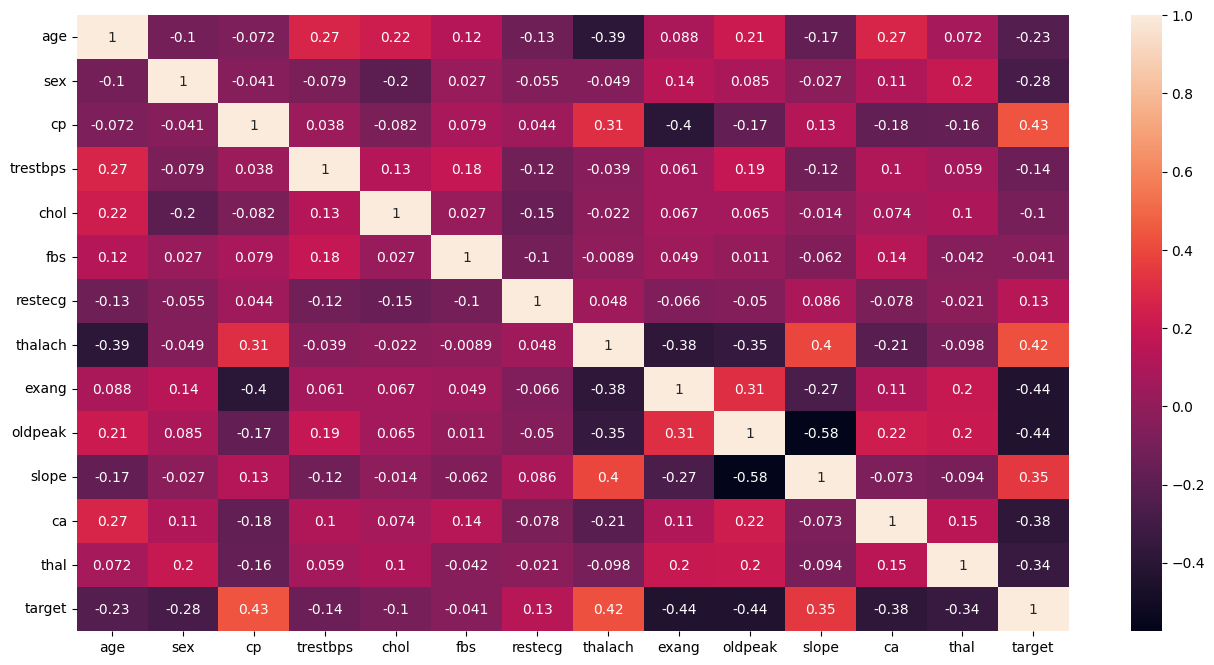

In [32]:
fig,ax=plt.subplots(figsize=(16,8))
sns.heatmap(data.corr(),annot=True)

target
1    526
0    499
Name: count, dtype: int64


Text(0.5, 1.0, 'Heart Disease Classes')

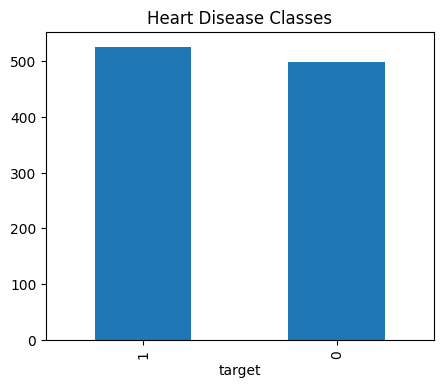

In [33]:
print(data.target.value_counts())
fig,ax=plt.subplots(figsize=(5,4))
ax=data.target.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes")

Text(0.5, 1.0, 'Age Distribution')

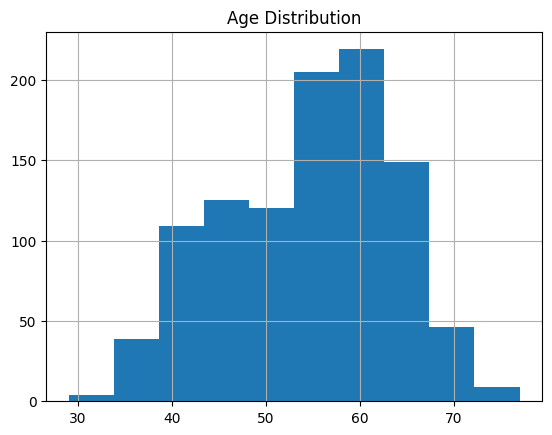

In [35]:
data["age"].hist().plot()
plt.title("Age Distribution")

<ipython-input-36-0a2c7cbb1924>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['trestbps'])


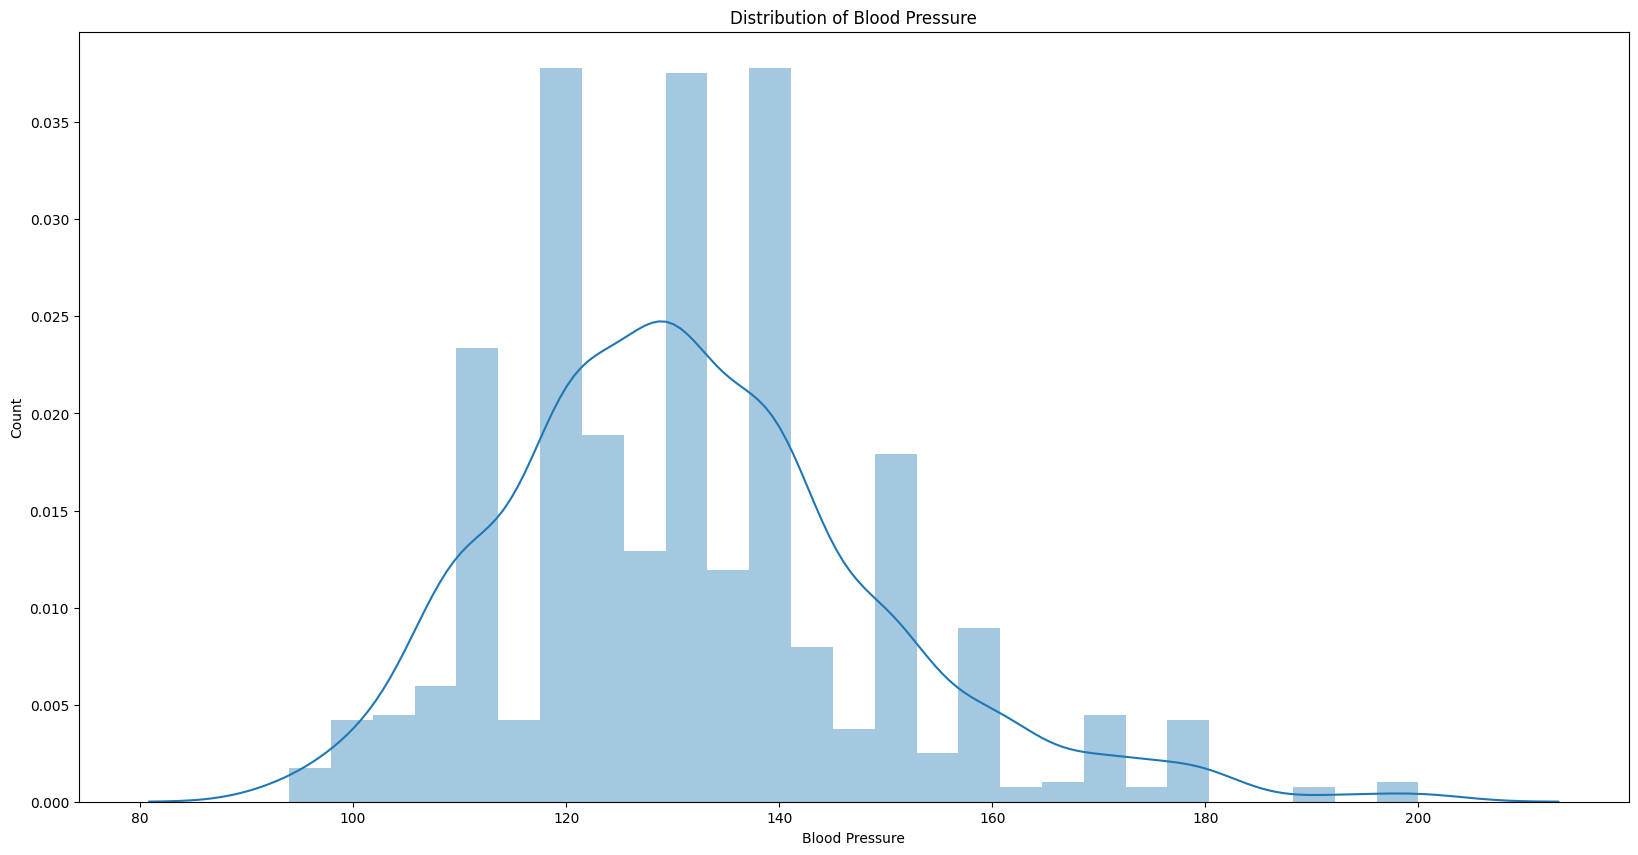

In [36]:
plt.figure(figsize=(20,10))
sns.distplot(data['trestbps'])
plt.title("Distribution of Blood Pressure")
plt.xlabel("Blood Pressure")
plt.ylabel("Count")
plt.show()

<ipython-input-41-48a8a1b005c1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['thalach'], color='purple')


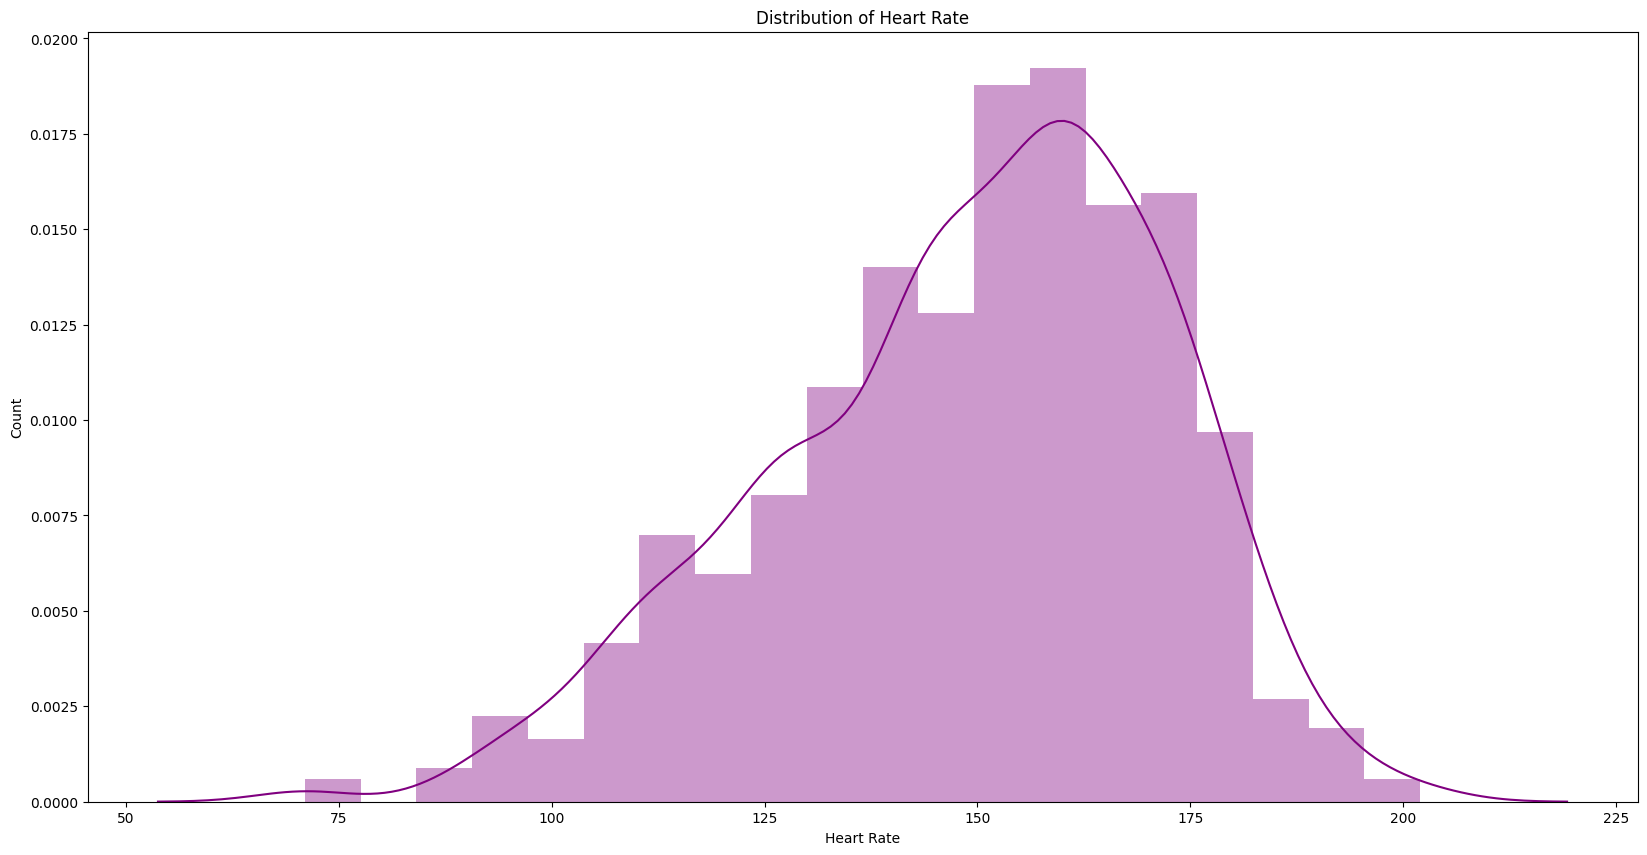

In [41]:
plt.figure(figsize=(20,10))
sns.distplot(data['thalach'], color='purple')
plt.title("Distribution of Heart Rate")
plt.xlabel("Heart Rate")
plt.ylabel("Count")
plt.show()

<ipython-input-40-0c19995689d7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['chol'], kde= True, color='red')


<Axes: xlabel='chol', ylabel='Density'>

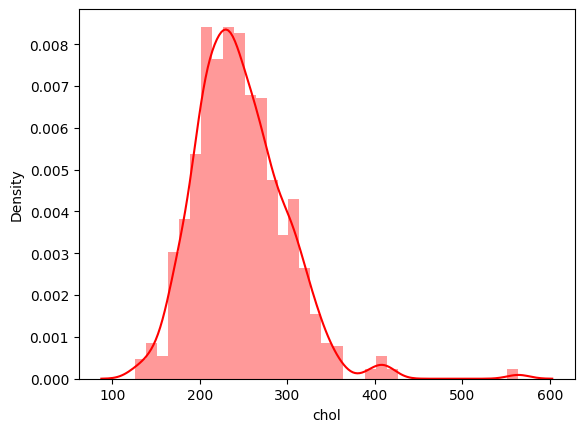

In [40]:
sns.distplot(data['chol'], kde= True, color='red')



---


PAIRPLOT

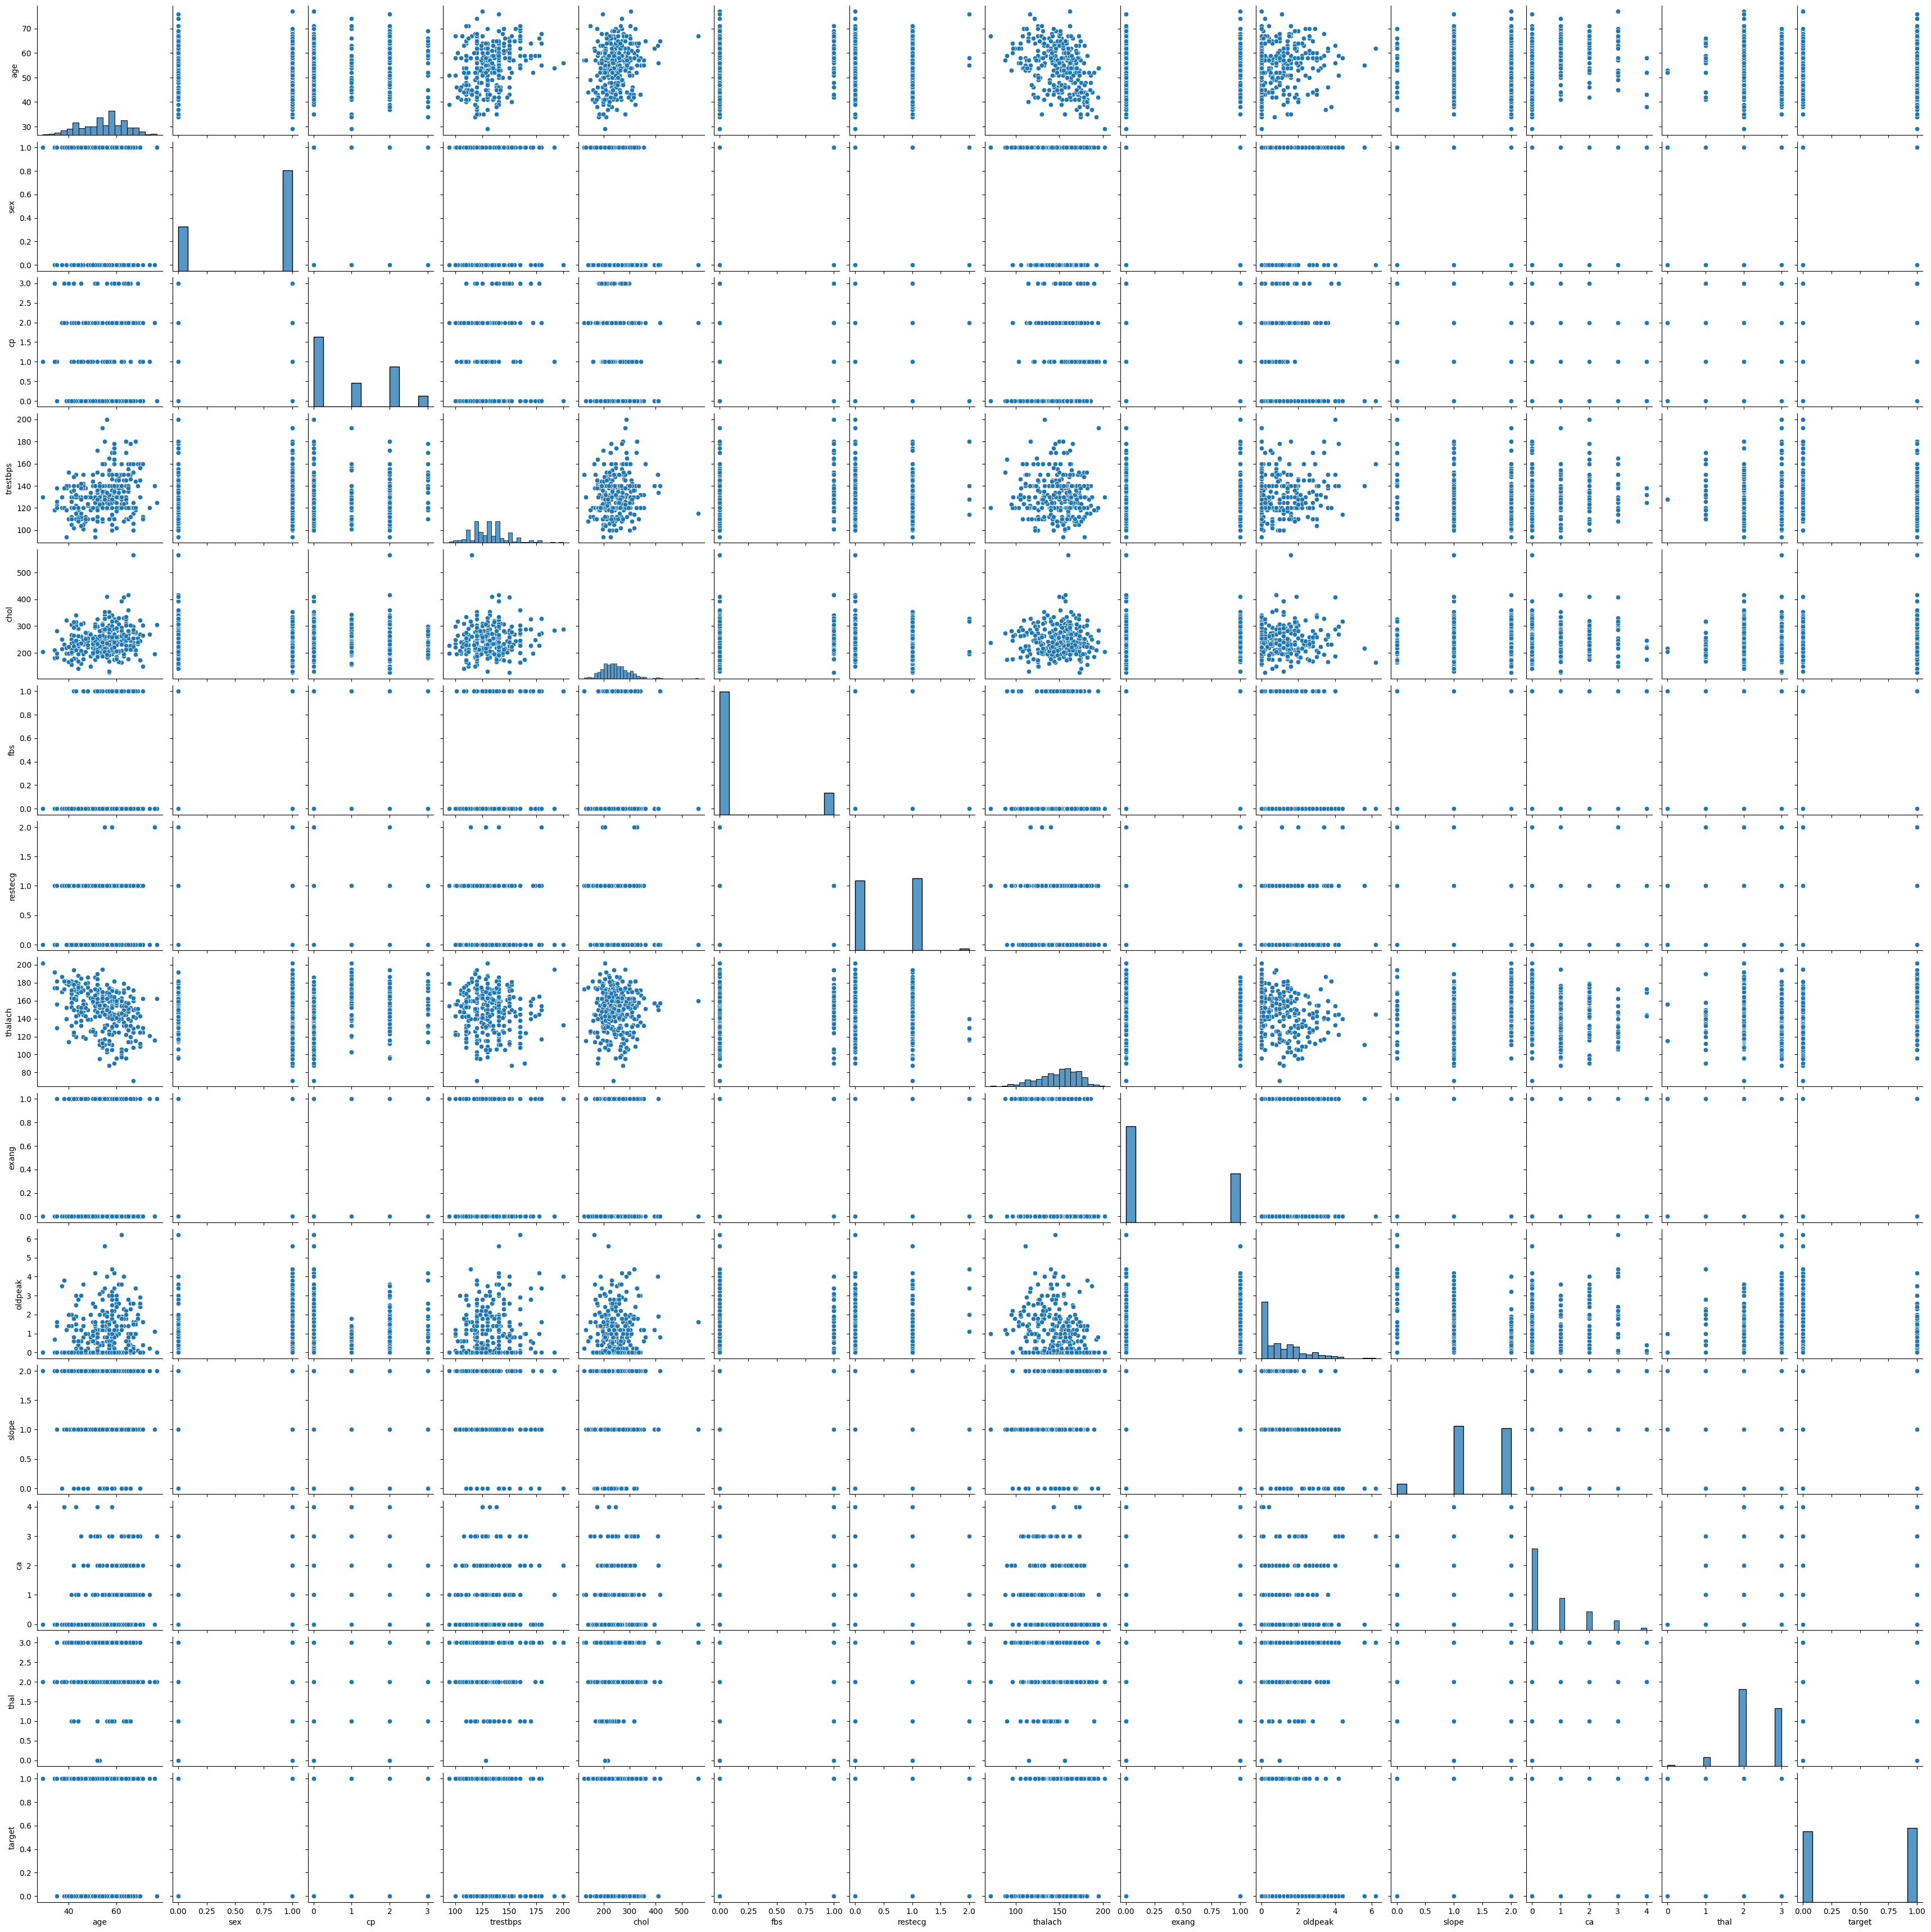

In [54]:
sns.pairplot(data)



---


JOINTPLOT

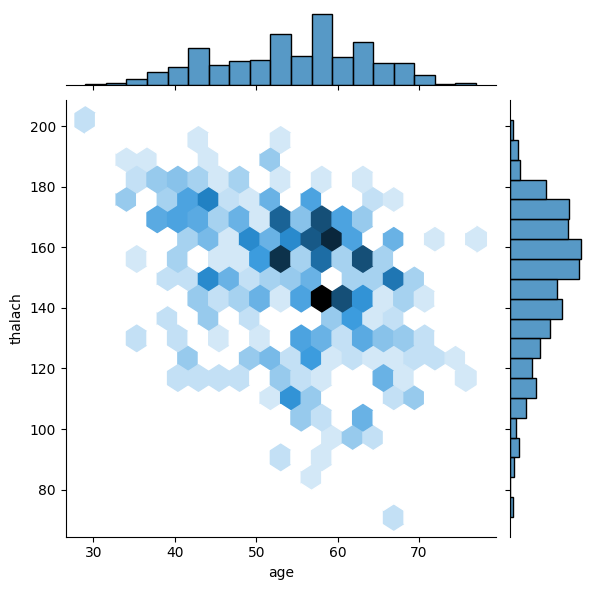

In [56]:
sns.jointplot(x='age', y='thalach' ,data=data,kind='hex')

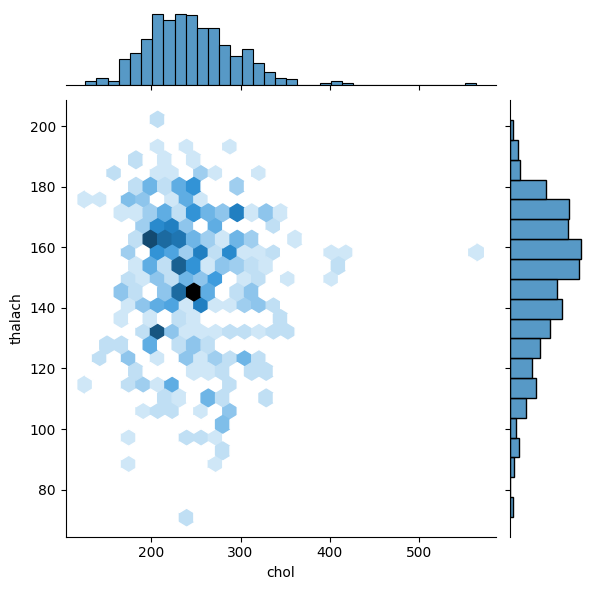

In [57]:
sns.jointplot(x='chol', y='thalach' ,data=data,kind='hex')

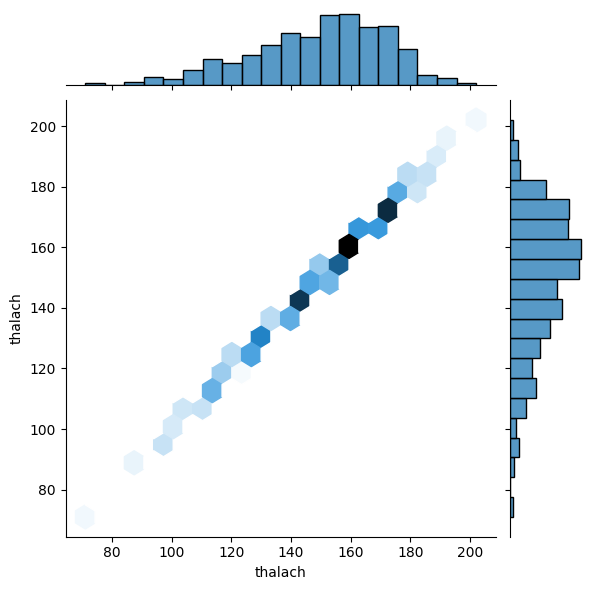

In [59]:
sns.jointplot(x='thalach', y='thalach' ,data=data,kind='hex')

<Axes: xlabel='sex', ylabel='count'>

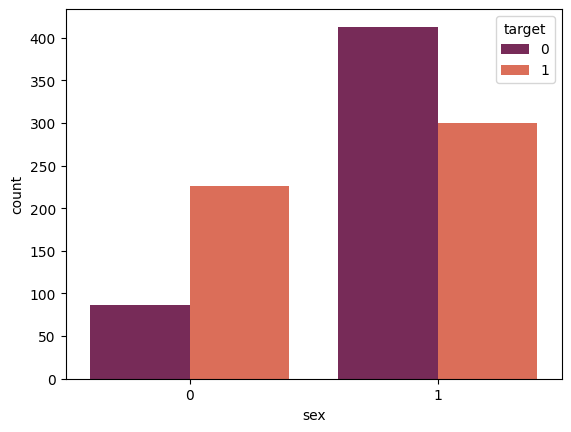

In [74]:
sns.countplot(x="sex", hue="target", data=data, palette="rocket")

<Axes: xlabel='target', ylabel='sex'>

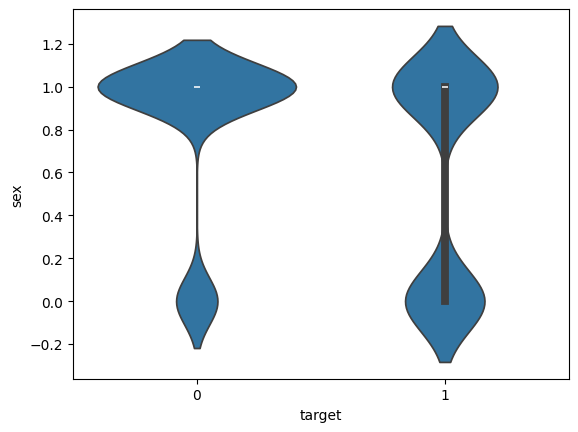

In [75]:
sns.violinplot(y= data['sex'],x=data['target'])